# Классификация текстов с использованием Наивного Байесовского Классификатора

## Задание 1 (1 балл)

Откройте данные. Узнайте, сколько в них спам- и не спам-писем. Визуализируйте полученные соотношение подходящим образом.

In [28]:
# откроем данные:
import numpy as np
import pandas as pd
sms_data = pd.read_csv('data\spam_or_not_spam.csv')
sms_data.head()

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


In [29]:
# основная информация о датафрейм
sms_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   2999 non-null   object
 1   label   3000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 47.0+ KB


In [30]:
# рассчитайте частоты для классов : ваш код здесь
sms_data['label'].value_counts()

0    2500
1     500
Name: label, dtype: int64

In [31]:
# визуализируйте результат:
import plotly.express as px

# строим график:  
bar_data = sms_data['label'].value_counts()
fig = px.bar(
    data_frame=bar_data, 
    #y=bar_data, 
    #x="label", 
    color='value', #расцветка в зависимости от класса
    orientation='v', 
    width=600,
    labels={'value':'Частота', 'label':'Класс'},
    title='Частоты для классов'
)

# отображаем график:  
fig.show()


## Задание 2 (2 балла)

Вам необходимо предобработать ваши данные и перевести их в векторный вид. Подгрузим необходимый модуль:

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

Замените в данных все пустые строки и строки, состоящие из пробелов, на пропуски (NaN). После этого удалите из данных все строки, в которых наблюдаются пропущенные значения.

In [33]:
# найдем количество строк, состоящих из пробелов
sms_data[sms_data['email'] == " "].sum()

email      
label     2
dtype: object

In [34]:
# найдем количество пустых строк
sms_data.isnull().sum()

email    1
label    0
dtype: int64

In [35]:
# заменим в данных все строки состоящие из пробелов, на пропуски (NaN)
sms_data[sms_data==' '] = np.nan
print("кол-во пустых строк = ", sms_data.isnull().sum().sum())

кол-во пустых строк =  3


In [36]:
# Удалим все строки с пропущенными значениями
sms_data = sms_data.dropna(how='any', axis=0)
print("кол-во пустых строк = ", sms_data.isnull().sum().sum())

кол-во пустых строк =  0


Переводим данные в векторный вид:

In [37]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sms_data["email"])

Определите, сколько теперь признаков в нашем наборе данных:

In [38]:
X.shape

(2997, 34116)

## Задание 3 (2 балла)

Определите целевую переменную и признаки:

In [39]:
X = X
y = sms_data['label']

Разделите выборку на обучающую и тестовую, используя стратифицированное разбиение (параметр `stratify` установите в значение вектора ответов y) размер тестовой выборки (`test_size`) возьмите как 0.25, параметр `random_state` определите со значением 42:

In [40]:
#ваш код здесь
from sklearn.model_selection import train_test_split #сплитование выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y, random_state = 42)

Рассчитайте среднее значение целевой переменной по тестовой выборке:

In [41]:
# среднее значение целевой переменной 
y_test.mean()

0.16533333333333333

## Задание 4 (3 балла)

Определите и обучите подходящий алгоритм с параметром alpha = 0.01

In [42]:
# для задачи классификации текстов будем использовать алгоритм ComplementNB
from sklearn.metrics import *
from sklearn.naive_bayes import *

clf = MultinomialNB(alpha = 0.01)
clf.fit(X_train, y_train)
y_test_pred = clf.predict(X_test)

Оцените результат с точки зрения всех известных вам метрик (не менее трёх):

In [43]:
# получим метрики качества модели для алгоритма ComplementNB
print('Accuracy: {:.3f}'.format(accuracy_score(y_test, y_test_pred)))
print('Precision: {:.3f}'.format(precision_score(y_test, y_test_pred)))
print('Recall: {:.3f}'.format(recall_score(y_test, y_test_pred)))
print('F1: {:.3f}'.format(f1_score(y_test, y_test_pred)))


Accuracy: 0.987
Precision: 1.000
Recall: 0.919
F1: 0.958


In [44]:
# для задачи классификации текстов будем использовать алгоритм ComplementN
clf = ComplementNB(alpha = 0.01)
clf.fit(X_train, y_train)

y_test_pred = clf.predict(X_test)

# получим метрики качества модели для алгоритма ComplementN
print('Accuracy: {:.3f}'.format(accuracy_score(y_test, y_test_pred)))
print('Precision: {:.3f}'.format(precision_score(y_test, y_test_pred)))
print('Recall: {:.3f}'.format(recall_score(y_test, y_test_pred)))
print('F1: {:.3f}'.format(f1_score(y_test, y_test_pred)))


Accuracy: 0.988
Precision: 1.000
Recall: 0.927
F1: 0.962


Нарисуйте ROC-кривую:

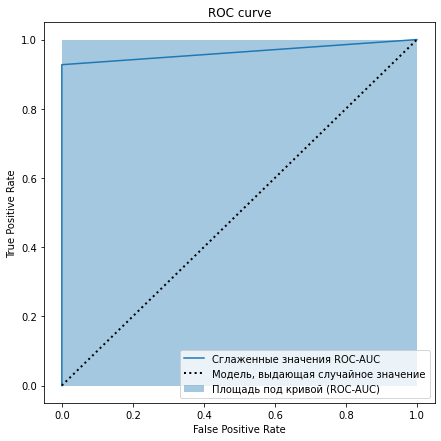

In [45]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
false_positive_rates, true_positive_rates, threshold = roc_curve(y_test, y_test_pred)

# создаём график
plt.figure(figsize=(7, 7))

# рисуем кривую
plt.plot(false_positive_rates, true_positive_rates, 
         label='Сглаженные значения ROC-AUC')

# кривая, соответствующая случайному угадыванию
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle=':', 
         label='Модель, выдающая случайное значение')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.fill_between(false_positive_rates, true_positive_rates, step="pre", 
                 alpha=0.4, label='Площадь под кривой (ROC-AUC)')
plt.legend()
plt.show()

## Задание 5 (3 балла)

Переберите несколько значений alpha с помощью кросс-валидации. Оцените, зависит ли от этого параметра качество классификации.

In [46]:
# используем метод GridSearchCV
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha':[0.01, 0.02, 0.03, 0.05, 0.07, 0.09, 0.1]}
clf = ComplementNB()
cv = GridSearchCV(clf, param_grid, n_jobs=-1)
cv.fit(X_train, y_train)
print('лучшее значение alpha =', cv.best_params_)
print('лучшее значение accuracy =', cv.best_score_)
print('значения accuracy: ',cv.cv_results_["mean_test_score"])

лучшее значение alpha = {'alpha': 0.07}
лучшее значение accuracy = 0.9906547884187082
значения accuracy:  [0.98931948 0.98932047 0.98887503 0.99021034 0.99065479 0.99065479
 0.99020935]


In [48]:
# построим график зависимости метрики от alpha
import plotly.express as px
x=np.array([0.01, 0.02, 0.03, 0.05, 0.07, 0.09, 0.1])
fig = px.line( x=x, y=cv.cv_results_["mean_test_score"], markers=True)
fig.update_layout(title='график зависимости метрики accuracy от alpha',
                   xaxis_title='alpha',
                   yaxis_title='accuracy')
fig.show()